<h1><center>An Alternating Minimization Algorithm with Trajectory (AMAT) for Direct Exoplanet Detection</center></h1>

We start with importing libraries.

In [27]:
from vip_hci.metrics import snrmap
from amat import amat_all, amat_for_a_trajectory
import vip_hci as vip
from vip_hci.var import frame_center
from hciplot import plot_frames

We should upload dataset and normalize PSF. And to decrease the computation time, we crop the frames.

In [2]:
datpath = 'datasets/'
dataset_name = 'sphere_k1_51eri_2016'

In [3]:
dataset = vip.hci_dataset.Dataset(
    cube=vip.fits.open_fits(datpath+dataset_name, verbose=False),
    angles=vip.fits.open_fits(datpath+dataset_name, n=1, verbose=False),
    psf=vip.fits.open_fits(datpath+dataset_name+'_psf',verbose=False)
)

Cube array shape: (256, 200, 200)
Angles array shape: (256,)
PSF array shape: (50, 50)


In [4]:
dataset.crop_frames(100)
dataset.normalize_psf(verbose=False, size=11)
cube = dataset.cube
psfn = dataset.psfn
angles = dataset.angles
fwhm = dataset.fwhm

New shape: (256, 100, 100)
Normalized PSF array shape: (11, 11)
The attribute `psfn` contains the normalized PSF
`fwhm` attribute set to
4.849


Firstly, we can compare the algorithms using a trajectory which has planet signals. We implement the algorithm with two different norms. When we use $\ell_2$ norm, we use SVD for low rank approximation. 

In [5]:
pixels = (14, 42)

In [16]:
frame_full_1T_l2, res_full_1T_l2, _, a_full_1T_l2, i_full_1T_l2 = amat_for_a_trajectory(cube, angles, psfn, pixels, prad=1, 
                                                           ncomp=20, fwhm=fwhm, MAX_ITER=100, norm=2, 
                                                           alg='full', eps=0.001, map_output=True)
print("Intensity: ", a_full_1T_l2)

Intensity:  25.234760284423828


Because it is not easy to see the signal of planet in processing frame, we use snrmap function.  The white circle represents the location of the planet.

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 11:20:32
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 4 processes
Running time:  0:00:04.345548
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


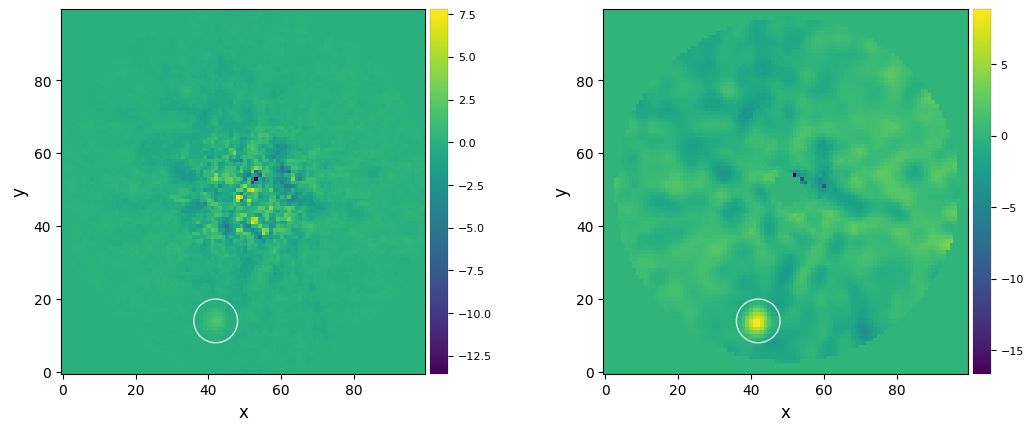

In [28]:
snrmap_full_1T_frame_l2 = snrmap(frame_full_1T_l2, fwhm)
plot_frames((frame_full_1T_l2, snrmap_full_1T_frame_l2), circle=(42,14))

We do the same procedure for $\ell_1$ norm. We use L1-LRA for low rank approximation. 

In [20]:
frame_full_1T_l1, res_full_1T_l1, _, a_full_1T_l1, i_full_1T_l1 = amat_for_a_trajectory(cube, angles, psfn, pixels, prad=1, 
                                                           ncomp=20, fwhm=fwhm, MAX_ITER=100, norm=1, 
                                                           alg='full', eps=0.001, map_output=True)
print("Intensity: ", a_full_1T_l1)

Intensity:  18.30609893798828


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 11:30:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 4 processes
Running time:  0:00:04.100502
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


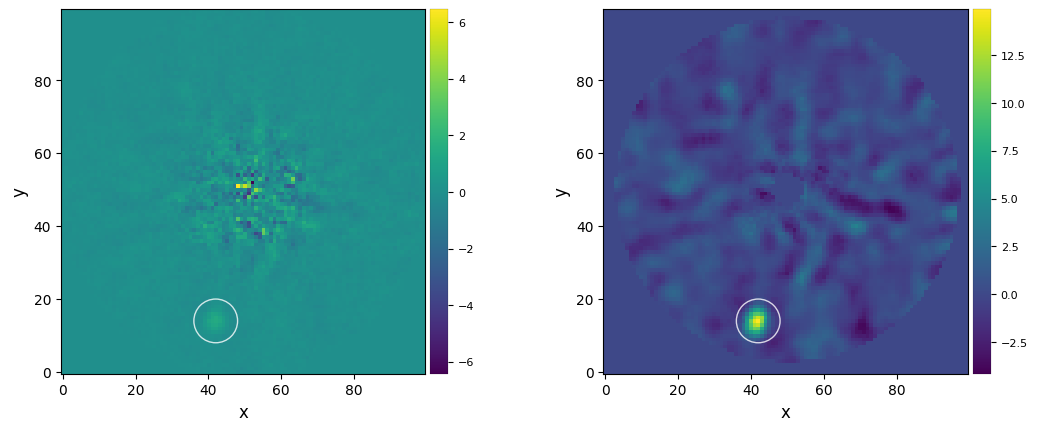

In [29]:
snrmap_full_1T_frame_l1 = snrmap(frame_full_1T_l1, fwhm)
plot_frames((frame_full_1T_l1, snrmap_full_1T_frame_l1), circle=(42,14))

Now, we do the same procedure with annular version to increase performance. So, we have chance to compare the planet pixels values, with the other pixels in the same annulus.  

In [23]:
frame_ann_1T_l2, res_ann_1T_l2, _, a_ann_1T_l2, i_ann_1T_l2 = amat_for_a_trajectory(cube, angles, psfn, pixels, prad=1, 
                                                           ncomp=20, fwhm=fwhm, MAX_ITER=100, asize=fwhm, norm=2, 
                                                           maxiter_inner=1, alg='ann', eps=0.001, map_output=True)
print("Intensity: ", a_ann_1T_l2)

Intensity:  27.143497467041016


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 11:34:08
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 4 processes
Running time:  0:00:02.283382
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


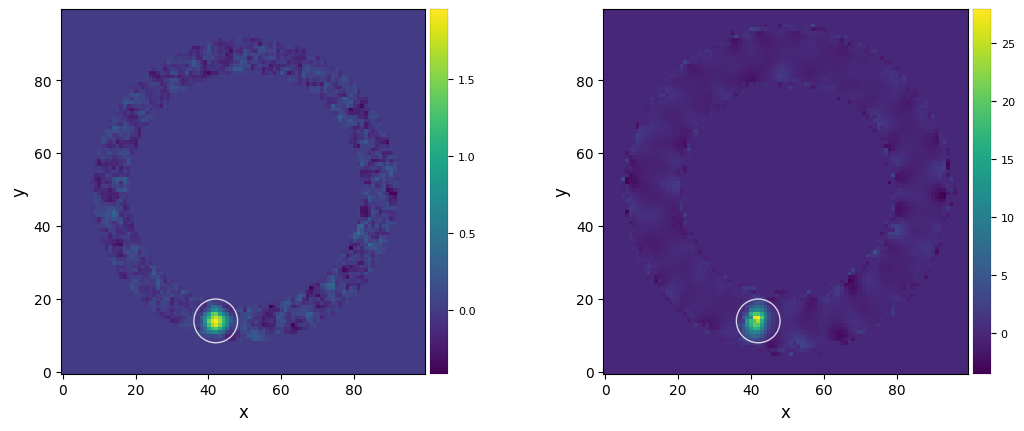

In [30]:
snrmap_ann_1T_frame_l2 = snrmap(frame_ann_1T_l2, fwhm)
plot_frames((frame_ann_1T_l2, snrmap_ann_1T_frame_l2), circle=(42,14))

In [24]:
frame_ann_1T_l1, res_ann_1T_l1, _, a_ann_1T_l1, i_ann_1T_l1 = amat_for_a_trajectory(cube, angles, psfn, pixels, prad=1, 
                                                           ncomp=20, fwhm=fwhm, MAX_ITER=100, asize=fwhm, norm=1, 
                                                           maxiter_inner=1, alg='ann', eps=0.001, map_output=True)
print("Intensity: ", a_ann_1T_l1)

Intensity:  16.279760360717773


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 11:34:35
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 4 processes
Running time:  0:00:02.402465
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


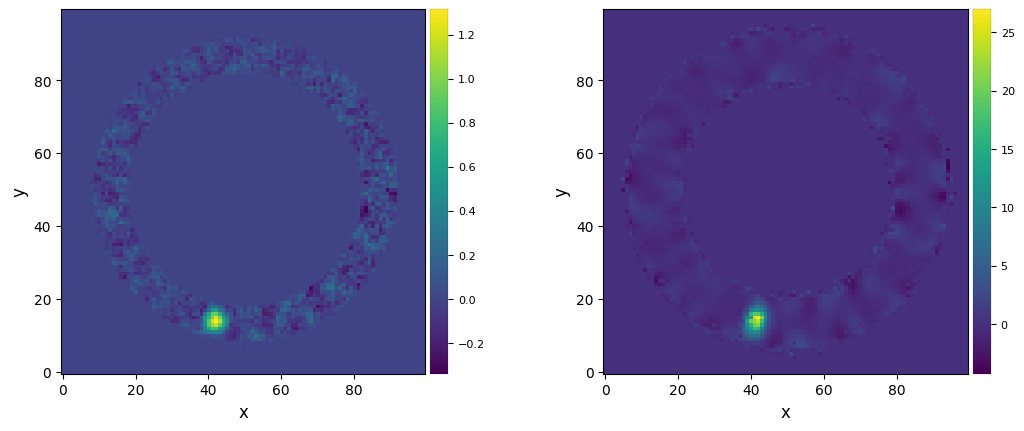

In [31]:
snrmap_ann_1T_frame_l1 = snrmap(frame_ann_1T_l1, fwhm)
plot_frames((frame_ann_1T_l1, snrmap_ann_1T_frame_l1))

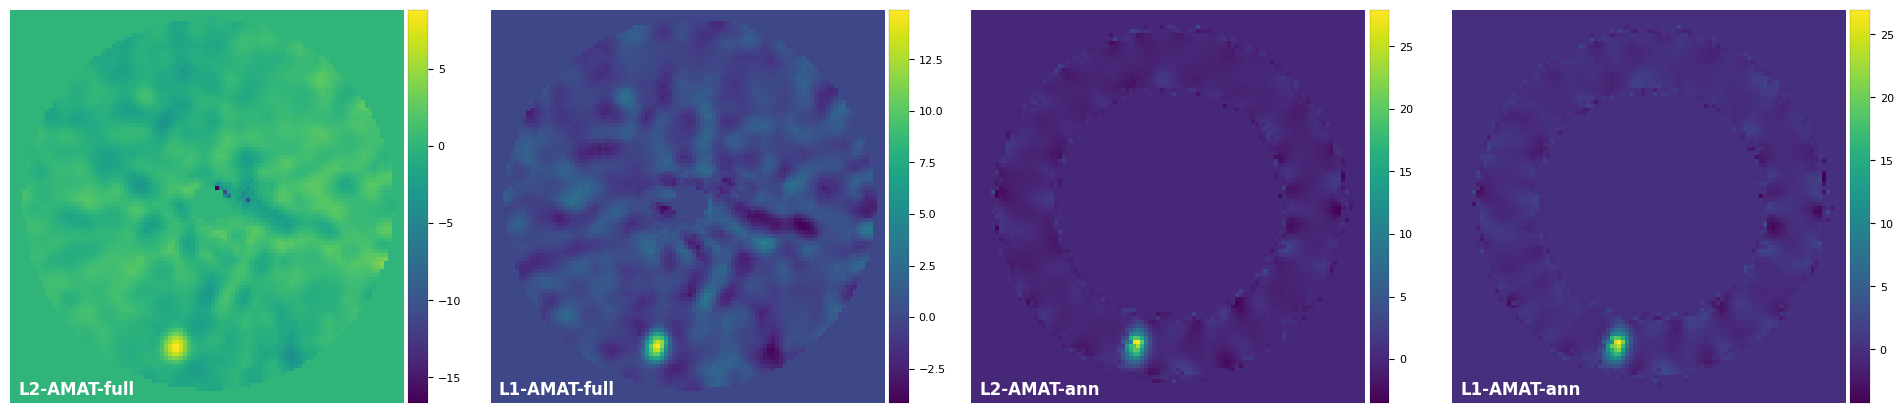

In [32]:
plot_frames((snrmap_full_1T_frame_l2, snrmap_full_1T_frame_l1, snrmap_ann_1T_frame_l2, snrmap_ann_1T_frame_l1), 
            rows=1, colorbar=True, label_size=12, label_pad=8, axis=False, versp=0.05, horsp=0.15, 
            label=('L2-AMAT-full', 'L1-AMAT-full', 'L2-AMAT-ann', 'L1-AMAT-ann'))

It is clear that $\ell_1$ norm has a better performance than $\ell_2$ norm if we use full version. However, in annular version, they seem similar performances.

In the real scenarios, we don't know the location of planet, we should apply our algorithms for all possible trajectories. It may takes time to complete all pixels.

In [8]:
result_l2 = amat_all(cube, angles, psfn, prad=1, pixels=None, fwhm=fwhm,  
                  ncomp = 20, n_jobs = 8, asize= fwhm, MAX_ITER=100, norm=2,
                  maxiter_inner=1, alg='ann', full_output=True, eps=0.001)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 17.6min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 30.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 44.2min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 62.2min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 82.0min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed: 102.0min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 121.1min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed: 140.4min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed: 161.6min
[Parallel(n_jobs=8)]: Done 7104 out of 7104 | elapsed: 194.8min finished


In [9]:
frame_l2, der_residual_cube_l2, fluxmap_l2, itermap_l2 = result_l2

We can apply SNR maps both processing frame (combined of all frames) and fluxmap (combined of all intensities). 

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-26 19:05:20
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


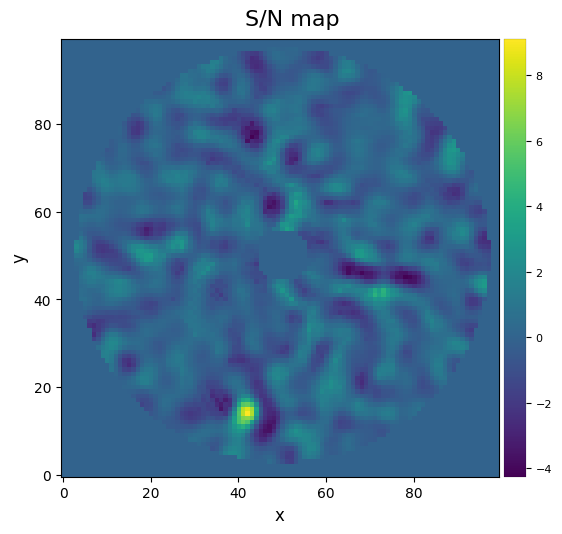

S/N map created using 4 processes
Running time:  0:00:03.627556
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [10]:
snrmap_frame_l2 = snrmap(frame_l2, fwhm, plot=True)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-26 19:05:48
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


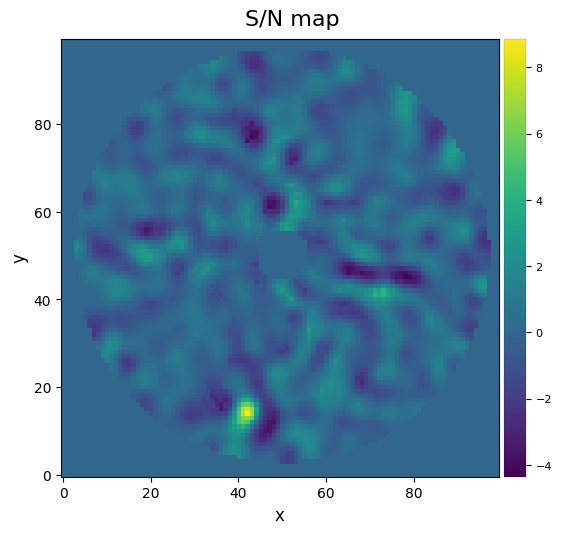

S/N map created using 4 processes
Running time:  0:00:04.366507
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [11]:
snrmap_fluxmap_l2 = snrmap(fluxmap_l2, fwhm, plot=True)

In [12]:
result_l1 = amat_all(cube, angles, psfn, prad=1, pixels=None, fwhm=fwhm,  
                  ncomp = 20, n_jobs = 8, asize= fwhm, MAX_ITER=100, norm=1,
                  maxiter_inner=1, alg='ann', full_output=True, eps=0.001)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 24.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 53.9min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 98.6min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 151.3min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 207.0min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 265.9min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed: 328.9min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 401.8min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed: 479.8min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed: 580.5min
[Parallel(n_jobs=8)]: Done 7104 out of 7104 | elapsed: 703.2min finished
/home/hazan/Documents/papers/AMAT/amat.py:239: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(a_amat[i+1]-a_amat[i])/np.abs(a_amat[i+1])<eps:

In [13]:
frame_l1, der_residual_cube_l1, fluxmap_l1, itermap_l1 = result_l1

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 10:36:17
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


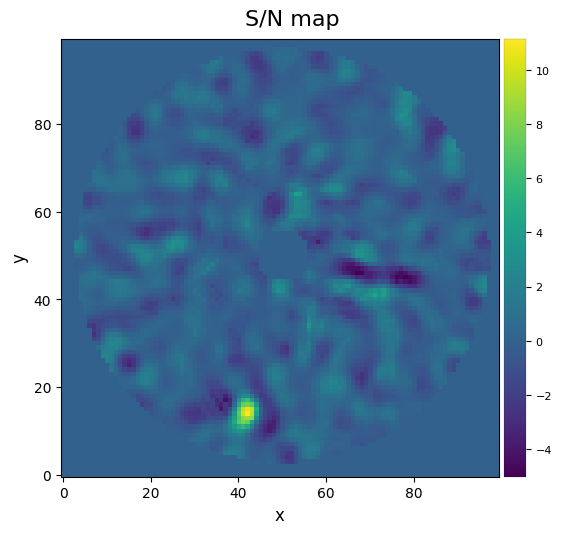

S/N map created using 4 processes
Running time:  0:00:03.796917
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [14]:
snrmap_frame_l1 = snrmap(frame_l1, fwhm, plot=True)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-27 10:36:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


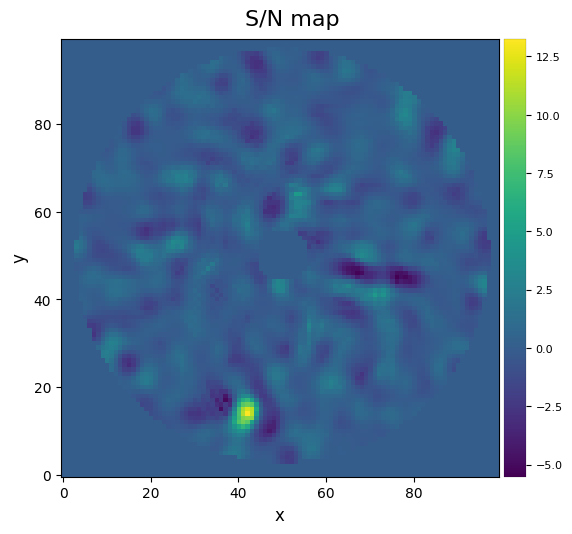

S/N map created using 4 processes
Running time:  0:00:03.486675
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [15]:
snrmap_fluxmap_l1 = snrmap(fluxmap_l1, fwhm, plot=True)

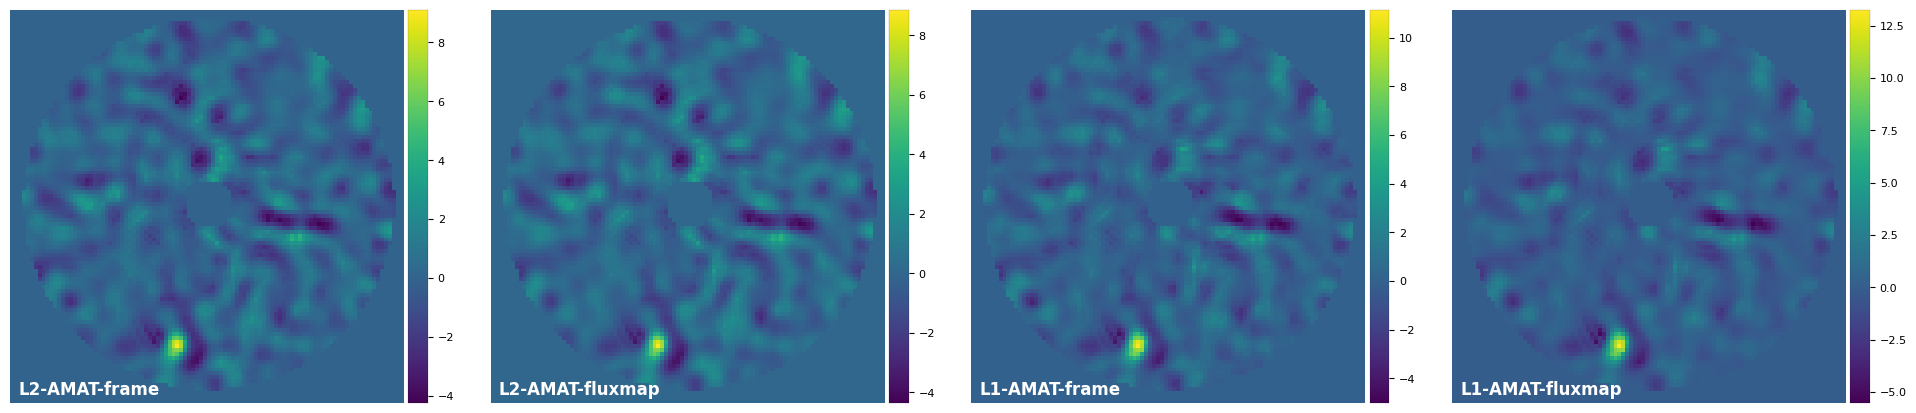

In [33]:
plot_frames((snrmap_frame_l2, snrmap_fluxmap_l2, snrmap_frame_l1, snrmap_fluxmap_l1), 
            rows=1, colorbar=True, label_size=12, label_pad=8, axis=False, versp=0.05, horsp=0.15, 
            label=('L2-AMAT-frame', 'L2-AMAT-fluxmap', 'L1-AMAT-frame', 'L1-AMAT-fluxmap'))

In $\ell_2$ norm, processing frame and fluxmap have similar performances, but in $\ell_1$ norm, fluxmap outperforms the processing frame. We get the best result using $\ell_1$ norm-fluxmap.

In [34]:
from vip_hci.psfsub import pca_annular

res = pca_annular(cube, angles, fwhm=fwhm, ncomp=20, asize=fwhm)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-29 11:14:15
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
N annuli = 10, FWHM = 4.849
PCA per annulus (or annular sectors):
Ann 1    PA thresh: 11.42    Ann center:   2    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:01.459315
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 2    PA thresh:  7.63    Ann center:   7    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:05.463284
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 3    PA thresh:  6.87    Ann center:  12    N segments: 1 
Done PCA with lapack for current annulus
Running time:  0:00:11.675309
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Ann 4    PA thresh:  6.54    Ann center:  17    N segments: 1 
Done PCA with lapack for curr

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-29 11:16:01
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


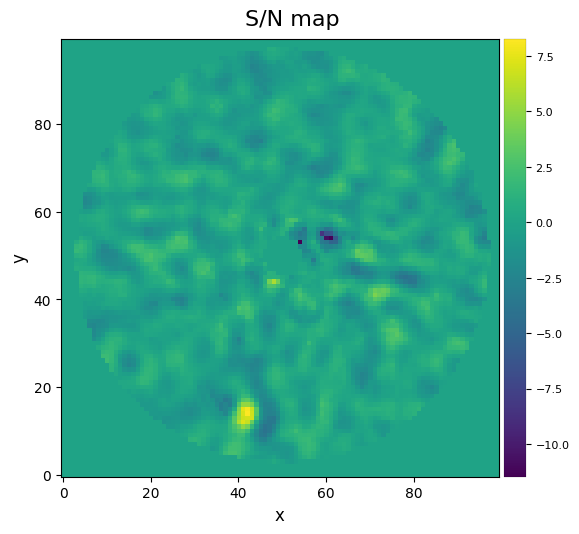

S/N map created using 4 processes
Running time:  0:00:05.407281
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [35]:
snr_pca = snrmap(res, fwhm, plot=True)

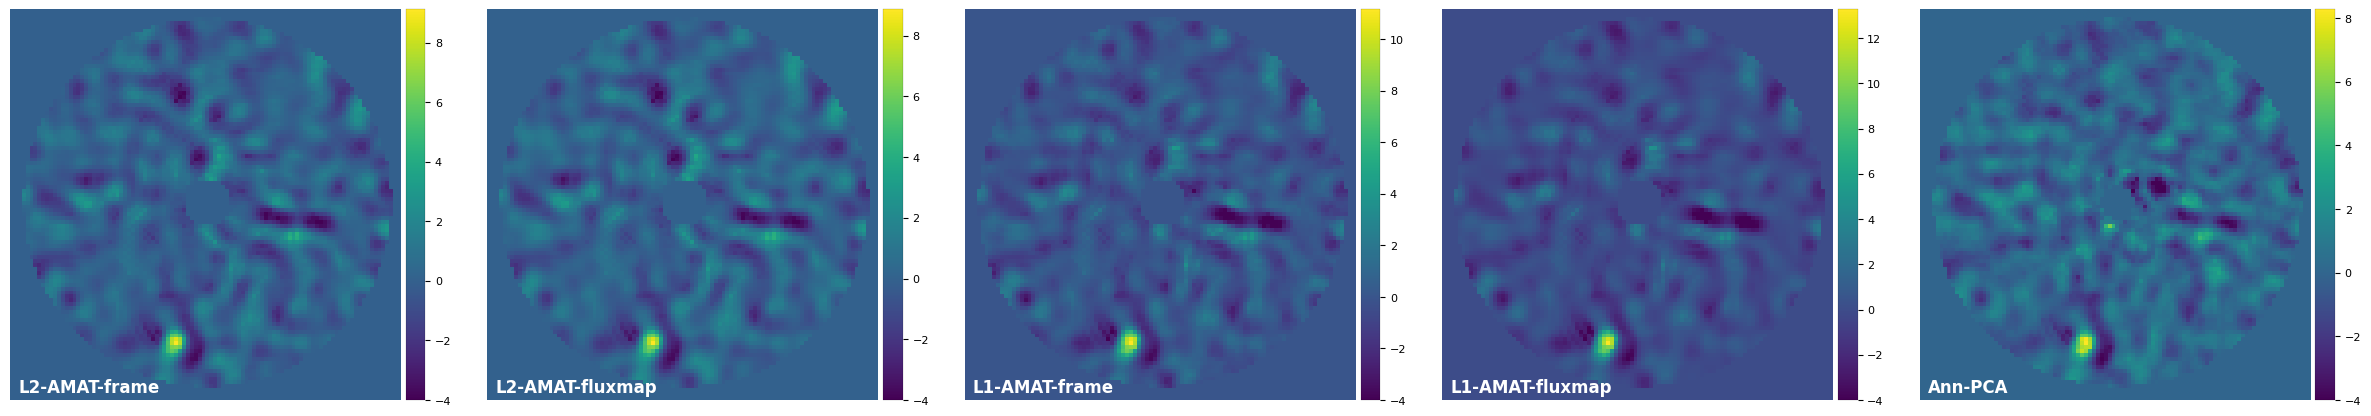

In [36]:
plot_frames((snrmap_frame_l2, snrmap_fluxmap_l2, snrmap_frame_l1, snrmap_fluxmap_l1, snr_pca), 
            rows=1, colorbar=True, label_size=12, label_pad=8, axis=False, versp=0.05, horsp=0.15, 
            label=('L2-AMAT-frame', 'L2-AMAT-fluxmap', 'L1-AMAT-frame', 'L1-AMAT-fluxmap', 'Ann-PCA'), vmin=-4)